In [3]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import pandas as pd

### HYPER PARAMETERS

In [4]:
env_names = ['Ant-v2','HalfCheetah-v2','Hopper-v2','Humanoid-v2','Reacher-v2','Walker2d-v2']
hidden_dim = 100  # (100, 50)
batch_size = 32
epoch = 25

iters = 2 # Dagger iterations
rollouts = 20

## Results

In [5]:
df = pd.DataFrame(index = env_names, columns = ['Expert Mean(Std)','Behavioral Cloning','DAgger'])
for env_name in env_names:
    expert_data = read_expert_data('data/expert_data', env_name)
    clone_data  = read_agent_data('data/agent_data',env_name,hidden_dim)
    dagger_data = read_agent_data('data/agent_data',env_name,hidden_dim, 1)
    
    df.loc[env_name,'Expert Mean(Std)'] = str(np.around(np.mean(expert_data['returns']),3)) \
                                  + '(' + str(np.around(np.std(expert_data['returns']),3)) + ')'
    
    df.loc[env_name,'Behavioral Cloning'] = str(np.around(np.mean(clone_data['returns']),3)) \
                                    + '(' + str(np.around(np.std(clone_data['returns']),3)) + ')'
    
    df.loc[env_name,'DAgger'] = str(np.around(np.mean(dagger_data['returns']),3)) \
                        + '(' + str(np.around(np.std(dagger_data['returns']),3)) + ')'
df

,Expert Mean(Std),Behavioral Cloning,DAgger
Ant-v2,4812.985(84.019),4827.569(90.618),4646.346(550.509)
HalfCheetah-v2,4142.17(75.643),3992.12(122.34),4093.712(127.101)
Hopper-v2,3778.045(3.943),1688.032(614.337),2837.985(660.367)
Humanoid-v2,10401.123(59.41),386.604(59.577),712.85(415.838)
Reacher-v2,-3.673(1.523),-5.929(2.195),-5.095(2.245)
Walker2d-v2,5490.934(118.741),3532.856(2105.16),5400.991(101.485)


## Section2. Behavioral Cloning

### *2.1 Behavioral cloning agent that achieves comparable performance to the expert* 
#### *Ant-V2*

In [4]:
env_name = env_names[0]

clone_data  = read_agent_data('data/agent_data',env_name,hidden_dim)
    
clone_reward = clone_data['returns']
clone_mean = np.mean(clone_data['returns'])
clone_std = np.std(clone_data['returns'])

expert_data = read_expert_data('data/expert_data',env_name)
expert_mean = np.mean(expert_data['returns'])
expert_std  = np.std(expert_data['returns'])

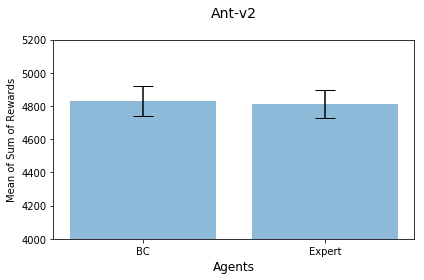

In [5]:
plt.title('Ant-v2\n', fontsize = 14)
plt.bar(np.arange(2),[clone_mean,expert_mean], yerr = [clone_std, expert_std], 
        align = 'center', alpha = 0.5, capsize = 10)
plt.ylabel('Mean of Sum of Rewards')
plt.xlabel('Agents', fontsize = 12)
plt.xticks(np.arange(2),['BC','Expert'])
plt.ylim(4000,5200)
plt.tight_layout()
plt.show()

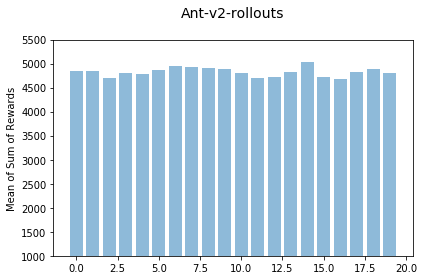

In [6]:
plt.title('Ant-v2-rollouts\n', fontsize = 14)
plt.bar(np.arange(20),clone_reward, 
        align = 'center', alpha = 0.5, capsize = 10)
plt.ylabel('Mean of Sum of Rewards')
plt.ylim(1000,5500)
plt.tight_layout()
plt.show()

*One of the most interesting aspects of environment Ant-v2 was that behavioral cloning surpasses the performance of expert agent. Since the environment is very simple, error in trajectory rather enhances the performance*

### *2.2 Behavioral cloning agent that dosen't achieve comparable performance to the expert*
#### *Walker2d-v2*

In [7]:
env_name = 'Walker2d-v2'

clone_data  = read_agent_data('data/agent_data',env_name,hidden_dim)
    
clone_reward = clone_data['returns']
clone_mean = np.mean(clone_data['returns'])
clone_std = np.std(clone_data['returns'])

expert_data = read_expert_data('data/expert_data',env_name)
expert_mean = np.mean(expert_data['returns'])
expert_std  = np.std(expert_data['returns'])

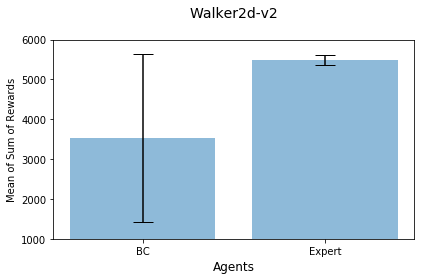

In [8]:
plt.title('Walker2d-v2\n', fontsize = 14)
plt.bar(np.arange(2),[clone_mean,expert_mean], yerr = [clone_std, expert_std], 
        align = 'center', alpha = 0.5, capsize = 10)
plt.ylabel('Mean of Sum of Rewards')
plt.xlabel('Agents', fontsize = 12)
plt.xticks(np.arange(2),['BC','Expert'])
plt.ylim(1000,6000)
plt.tight_layout()
plt.show()

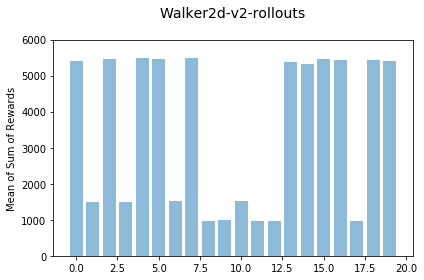

In [9]:
plt.title('Walker2d-v2-rollouts\n', fontsize = 14)
plt.bar(np.arange(20),clone_reward, 
        align = 'center', alpha = 0.5, capsize = 10)
plt.ylabel('Mean of Sum of Rewards')
plt.ylim(0,6000)
plt.tight_layout()
plt.show()

*Compared to Ant-v2 environment, behavioral Cloning agent in Walker2d-v2 has shown very poor performance compared to expert Agent. <br>
By looking at the sum of rewards of each roll-out, we can easily say that the poor performance was caused from a tremendously huge variance. <br><br>
My personal analysis for these outcomes caused from stableness and complexness of the environments.<br>
Though small errors in environment are in-evitable, Ant-v2 environment allows agent to be adaptable to the new trajectory that was not seen during the training.<br>
However in Walker2d-v2, complex environment doesn't let agent to deal with the states that were never experienced before*

### *2.3 Hyperparameter that affects the performance of the behavioral cloning agent*
#### *Network-size*

In [10]:
df = pd.DataFrame(index = env_names, columns = ['Hidden-50','Hidden-100'])
for env_name in env_names:
    clone_data_50  = read_agent_data('data/agent_data',env_name,50)
    clone_data_100 = read_agent_data('data/agent_data',env_name,100)
    
    df.loc[env_name,'Hidden-50'] = str(np.around(np.mean(clone_data_50['returns']),3)) \
                                    + '(' + str(np.around(np.std(clone_data_50['returns']),3)) + ')'
    
    df.loc[env_name,'Hidden-100'] = str(np.around(np.mean(clone_data_100['returns']),3)) \
                        + '(' + str(np.around(np.std(clone_data_100['returns']),3)) + ')'
df

,Hidden-50,Hidden-100
Ant-v2,4798.416(117.273),4827.569(90.618)
HalfCheetah-v2,3852.788(137.074),3992.12(122.34)
Hopper-v2,1976.102(613.942),1688.032(614.337)
Humanoid-v2,362.65(38.194),386.604(59.577)
Reacher-v2,-7.506(3.223),-5.929(2.195)
Walker2d-v2,4670.748(1659.975),3532.856(2105.16)


*By looking at the tendency of increasement in sum of rewards with network sizes, it seems that larger network size helps agent to understand the complex environments.*

## Section3. DAgger

### *3.1 Results based on Iterations*

In [13]:
df = pd.DataFrame(index = env_names, columns = ['Behavioral Cloning','DAgger-1', 'DAgger-2'])
for env_name in env_names:
    clone_data = read_agent_data('data/agent_data',env_name,hidden_dim)
    dagger_data_1  = read_agent_data('data/agent_data',env_name,hidden_dim, 1)
    dagger_data_2 = read_agent_data('data/agent_data',env_name,hidden_dim, 2)
    
    df.loc[env_name,'Behavioral Cloning'] = str(np.around(np.mean(clone_data['returns']),3)) \
                                  + '(' + str(np.around(np.std(clone_data['returns']),3)) + ')'
    
    df.loc[env_name,'DAgger-1'] = str(np.around(np.mean(dagger_data_1['returns']),3)) \
                                    + '(' + str(np.around(np.std(dagger_data_1['returns']),3)) + ')'
    
    df.loc[env_name,'DAgger-2'] = str(np.around(np.mean(dagger_data_2['returns']),3)) \
                        + '(' + str(np.around(np.std(dagger_data_2['returns']),3)) + ')'
df

,Behavioral Cloning,DAgger-1,DAgger-2
Ant-v2,4827.569(90.618),4646.346(550.509),4789.681(90.619)
HalfCheetah-v2,3992.12(122.34),4093.712(127.101),4073.33(87.371)
Hopper-v2,1688.032(614.337),2837.985(660.367),3779.235(3.746)
Humanoid-v2,386.604(59.577),712.85(415.838),914.493(491.653)
Reacher-v2,-5.929(2.195),-5.095(2.245),-4.307(2.986)
Walker2d-v2,3532.856(2105.16),5400.991(101.485),5396.58(101.367)


> ####  *Note*

*Dagger-1, -2 indicate the number of iterations of the algorithms*<br>

### *3.2 Learning Curves*

#### *Ant-v2*

![title](images/Ant-v2.png)

#### *HalfCheetah-v2*

![title](images/HalfCheetah-v2.png)

#### *Hopper-v2*

![title](images/Hopper-v2.png)

#### *Humanoid-v2*

![title](images/Humanoid-v2.png)

#### *Reacher-v2*

![title](images/Reacher-v2.png)

#### *Walker2d-v2*

![title](images/Walker2d-v2.png)

*The most interesting part of the training was that the some of the learning curves were popping up right after the data aggeregation. 'Hopper, Humanoid, Reacher, Walker2d' were the environments that have shown popping up which were exactly same environments that have shown success in DAgger*